rays aperture 0.0
rays aperture 0.1719017
rays aperture 0.17109871
rays aperture 0.043785095
rays aperture 0.04240036


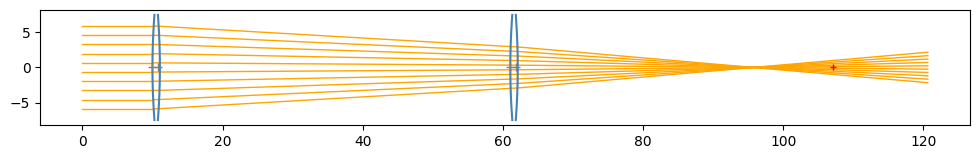

[  0/100] L=  0.394 | grad norm= 0.025499165058135986
[  5/100] L=  0.333 | grad norm= 0.023428166285157204
[ 10/100] L=  0.278 | grad norm= 0.02137892134487629


[ 15/100] L=  0.228 | grad norm= 0.01936899870634079
[ 20/100] L=  0.185 | grad norm= 0.01741603948175907
[ 25/100] L=  0.147 | grad norm= 0.015536622144281864


[ 30/100] L=  0.116 | grad norm= 0.013745764270424843
[ 35/100] L=  0.089 | grad norm= 0.012056284584105015
[ 40/100] L=  0.067 | grad norm= 0.010478584095835686


[ 45/100] L=  0.050 | grad norm= 0.009020335972309113
[ 50/100] L=  0.036 | grad norm= 0.00768663827329874
[ 55/100] L=  0.026 | grad norm= 0.006479981355369091


[ 60/100] L=  0.018 | grad norm= 0.005400442983955145
[ 65/100] L=  0.012 | grad norm= 0.004445731174200773
[ 70/100] L=  0.008 | grad norm= 0.003611563704907894


[ 75/100] L=  0.005 | grad norm= 0.002891829703003168
[ 80/100] L=  0.003 | grad norm= 0.002279113745316863
[ 85/100] L=  0.002 | grad norm= 0.0017646641936153173


[ 90/100] L=  0.001 | grad norm= 0.0013391516404226422
[ 95/100] L=  0.001 | grad norm= 0.0009928244398906827


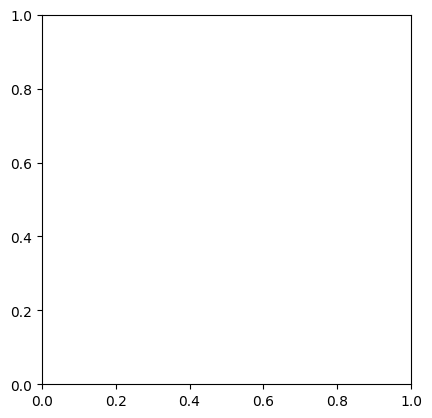

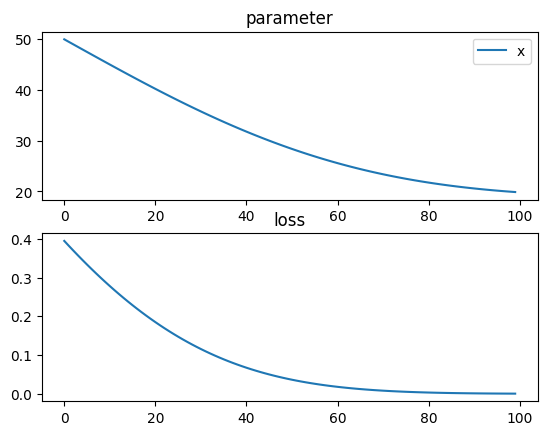

rays aperture 0.0
rays aperture 0.1719017
rays aperture 0.17109871
rays aperture 0.11008453
rays aperture 0.10796738


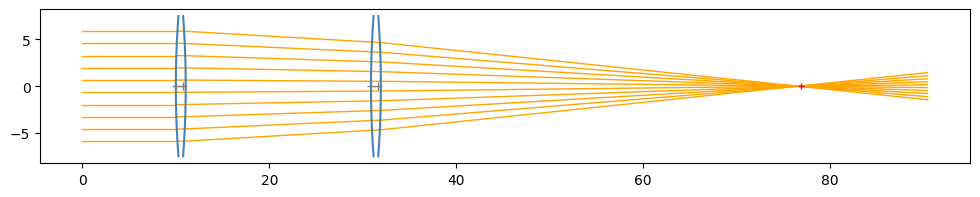

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

import torchlensmaker as tlm


class Optics(tlm.Module):
    def __init__(self):
        super().__init__()
        self.shape = tlm.Parabola(height=15., a=0.005)

        self.lens = tlm.SymmetricLens(self.shape, (1.0, 1.49), outer_thickness=0.5)

        self.x = nn.Parameter(torch.tensor(50.0))

        self.optics = tlm.OpticalSequence(
            tlm.PointSourceAtInfinity(beam_diameter=12),
            tlm.Gap(10.),
            
            self.lens,
            tlm.Gap(self.x),
            self.lens,
            
            tlm.Gap(45.0),
            tlm.FocalPoint(),
        )

    def forward(self, inputs, sampling):
        return self.optics(inputs, sampling)

optics = Optics()

tlm.render_plt(optics)

tlm.optimize(
    optics,
    optimizer = optim.Adam(optics.parameters(), lr=5e-1),
    sampling = {"rays": 10},
    num_iter = 100
)

tlm.render_plt(optics)